In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Data/BinRushedcorrected.zip

Archive:  /content/gdrive/MyDrive/Data/BinRushedcorrected.zip
   creating: BinRushed/BinRushed1/
  inflating: BinRushed/BinRushed1/image10-1.jpg  
  inflating: BinRushed/BinRushed1/image10-2.jpg  
  inflating: BinRushed/BinRushed1/image10-3.tif  
  inflating: BinRushed/BinRushed1/image10-4.jpg  
  inflating: BinRushed/BinRushed1/image10-5.jpg  
  inflating: BinRushed/BinRushed1/image10-6.jpg  
  inflating: BinRushed/BinRushed1/image1-1.jpg  
  inflating: BinRushed/BinRushed1/image11-1.jpg  
  inflating: BinRushed/BinRushed1/image11-2.jpg  
  inflating: BinRushed/BinRushed1/image11-3.tif  
  inflating: BinRushed/BinRushed1/image11-4.jpg  
  inflating: BinRushed/BinRushed1/image11-5.jpg  
  inflating: BinRushed/BinRushed1/image11-6.jpg  
  inflating: BinRushed/BinRushed1/image1-2.jpg  
  inflating: BinRushed/BinRushed1/image12-1.jpg  
  inflating: BinRushed/BinRushed1/image12-2.jpg  
  inflating: BinRushed/BinRushed1/image12-3.tif  
  inflating: BinRushed/BinRushed1/image12-4.jpg  
  inf

<function matplotlib.pyplot.show>

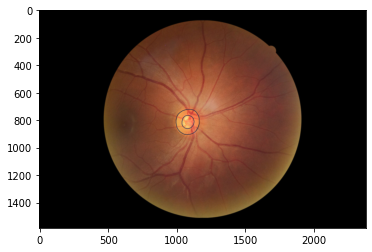

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 

img = cv2.imread("/content/BinRushed/BinRushed1-Corrected/image12-1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap="gray")

plt.show

In [ ]:
print(img.shape)

(1584, 2376, 3)


(1073, 785)


<function matplotlib.pyplot.show>

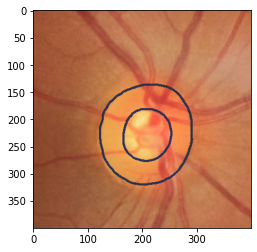

In [ ]:
grayForCropped = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grayForCropped, (5,5), 20)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(blur)
cropped = img[(maxLoc[1]-200):(maxLoc[1]+200), (maxLoc[0]-200):(maxLoc[0]+200)]
print(maxLoc)
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show>

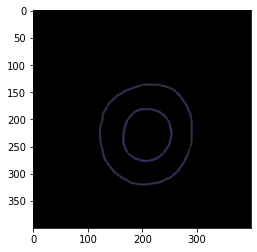

In [ ]:
cropped_hsv = cv2.cvtColor(cropped, cv2.COLOR_BGR2HSV)
lower = (50, 0, 0)
upper = (179, 255, 118)
mask = cv2.inRange(cropped_hsv, lower, upper)

result = cv2.bitwise_and(cropped, cropped, mask = mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show>

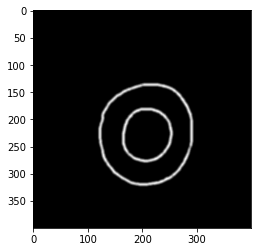

In [ ]:
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, 0)
thresh_blur = cv2.GaussianBlur(thresh, (5,5), 20)
plt.imshow(thresh_blur, cmap="gray")
plt.show

<function matplotlib.pyplot.show>

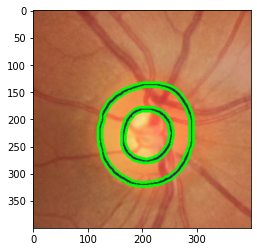

In [ ]:
contours, hierarchy = cv2.findContours(thresh_blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(cropped, contours, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
circle1 = contours[0]
circle2 = contours[2]
perimeter1 = cv2.arcLength(circle1, True)
perimeter2 = cv2.arcLength(circle2, True)
print(perimeter1, perimeter2)
print("cdr = ", perimeter2/perimeter1)

620.4579309225082 337.1787121295929
cdr =  0.5434352521342896
